In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio 
from PIL import Image
import time

In [2]:
image=imageio.imread('4.png')[359:471,359:471]
image1=Image.fromarray(image)
image1=image1.resize((50,50),resample=0)
image3=np.array(image1)

for i in range(50):
    for j in range(50):
        if image3[i,j]>50:
            image3[i,j]=1
        else:
            image3[i,j]=0

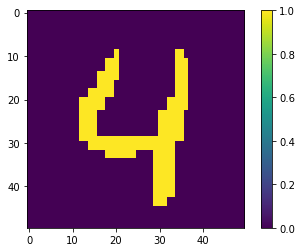

In [3]:
plt.imshow(image3)
plt.colorbar()
plt.show()

In [4]:
lamda=630e-9
halflamda=630e-9/2
distance=1e-5

In [5]:
#time estimate
output=np.zeros((50,50))*1j
time0=time.time()
dis_wave=distance/halflamda
for i1 in range(50):
    for j1 in range(50):
        for i2 in range(50):
            for j2 in range(50):
                #prop=np.sqrt((i1-i2)**2+(j1-j2)**2)*halflamda
                #output[i2,j2]=image3[i1,j1]*np.exp(-1j*2*np.pi*prop/lamda)
                prop=np.sqrt((i1-i2)**2+(j1-j2)**2+dis_wave**2)
                output[i2,j2]+=image3[i1,j1]*np.exp(-1j*2*np.pi*prop/2)
                

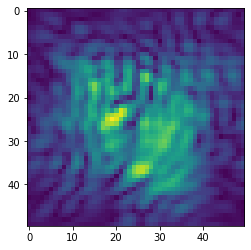

In [6]:
plt.imshow(np.abs(output))
plt.show()

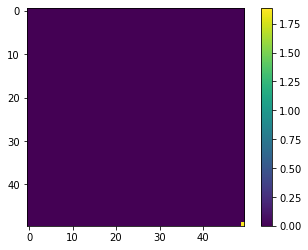

0.2453756332397461


In [22]:
import threading

time0=time.time()

def func(x,y):
    for i1 in range(50):
        for j1 in range(50):
            global image3
            global output
            distance=1e-5
            #prop=np.sqrt((i1-i2)**2+(j1-j2)**2)*halflamda
            #output[i2,j2]+=image3[i1,j1]*np.exp(-1j*2*np.pi*prop/lamda)
            prop=np.sqrt((i1-x)**2+(j1-y)**2+distance**2)
            output[x,y]+=image3[i1,j1]*np.exp(-1j*2*np.pi*prop/2)
    return output

output=np.zeros((50,50))*1j
threads=[]
for i in range(50):
    for j in range(50):
        t=threading.Thread(target=func, args=(i,j))
        threads.append(t)
        
t.start()
t.join()

plt.imshow(np.abs(output))
plt.colorbar()
plt.show()
                
time1=(time.time()-time0)
print(time1)

In [6]:
time0=time.time()
time.sleep(1)
time1=time.time()
print(time1-time0)

1.0010032653808594
